In [22]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset[['Age', 'Glucose']].values
y = dataset['Outcome'].values



In [23]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
unique_target = np.unique(y)

# Menampilkan jumlah nilai unique dalam kolom 'Outcome'
value_counts = [np.count_nonzero(y == 1), np.count_nonzero(y == 0)]
print("Jumlah kemunculan setiap nilai dalam kolom 'Outcome':\n", unique_target, "\n", value_counts)

Jumlah kemunculan setiap nilai dalam kolom 'Outcome':
 [0 1] 
 [268, 500]


In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(random_state=0) # for non-linear model use this parameter kernel='rbf'
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Akurasi:", accuracy)



Akurasi: 0.7604166666666666


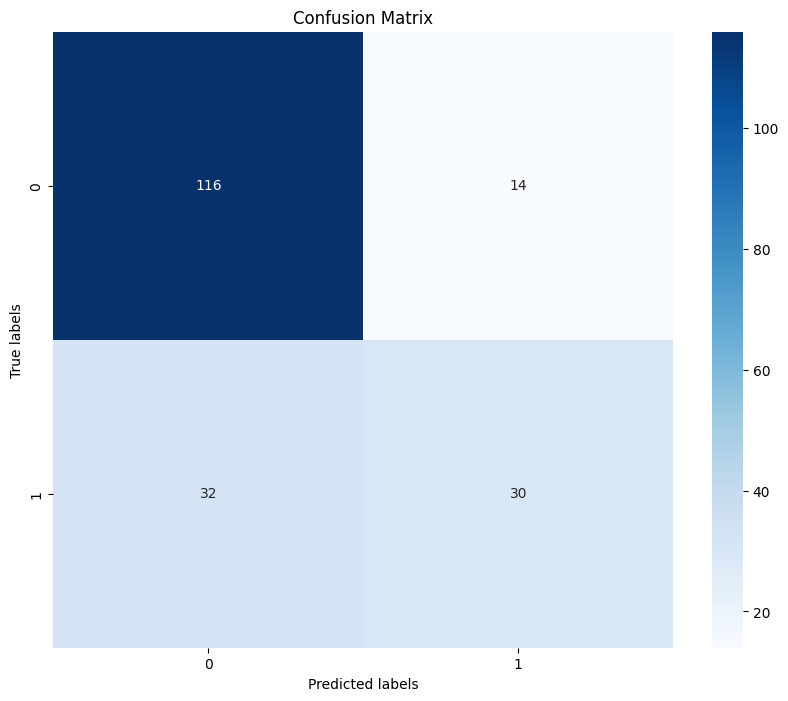

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_target, yticklabels=unique_target)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19188\643767482.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19188\643767482.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


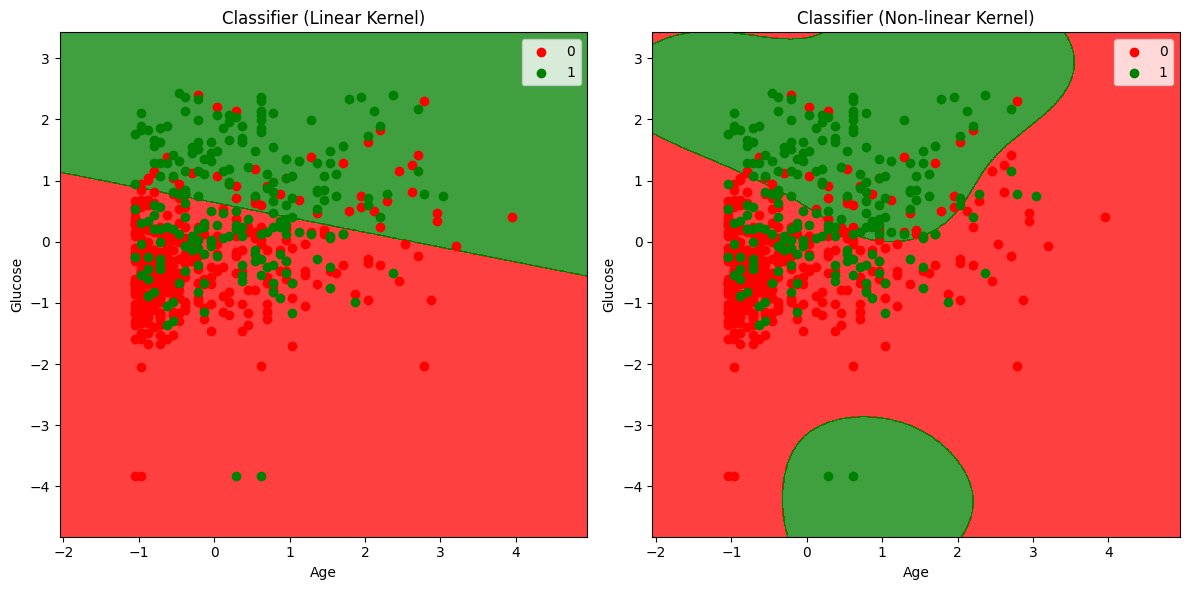

In [27]:
# Visualizing the Training set results for linear kernel
plt.figure(figsize=(12, 6))

# Fitting classifier to the Training set for linear kernel
from sklearn.svm import SVC
classifier_linear = SVC(kernel='linear', random_state=0)
classifier_linear.fit(X_train, y_train)

# Linear Kernel
plt.subplot(1, 2, 1)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j)
plt.title('Classifier (Linear Kernel)')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()

# Fitting classifier to the Training set for non-linear kernel
from sklearn.svm import SVC
classifier_rbf = SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_train, y_train)

# Visualizing the Training set results for non-linear kernel
plt.subplot(1, 2, 2)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j)
plt.title('Classifier (Non-linear Kernel)')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()

plt.tight_layout()
plt.show()
